In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
#cleaned
eng_path = "Team_player_data/cleaned/EPL.csv"
it_path = "Team_player_data/cleaned/SerieA.csv"
spain_path = "Team_player_data/cleaned/Liga.csv"

#read the cleaned data
eng_df = pd.read_csv(eng_path)
it_df = pd.read_csv(it_path)
spain_df = pd.read_csv(spain_path)
eng_df.head(10)

,Ranking,Year,Teams,Points,Goals+,Goals-,avg age,avg heights (cm),avg weight (kg),avg player rating,avg player value (EU),avg player wage
0,1,2019,Liverpool,99,85,33,24.00,180.48,73.18,76.00,18015303,88212
1,2,2019,Manchester City,81,102,35,24.09,180.45,74.12,76.85,22951363,112758
2,3,2019,Manchester United,66,66,36,24.76,183.21,75.36,77.45,19016666,106727
3,4,2019,Chelsea,66,69,54,25.21,182.82,77.00,76.79,18798787,98970
4,5,2019,Leicester City,62,67,41,25.64,181.94,78.30,73.97,7597727,44758
5,6,2019,Tottenham Hotspur,59,61,47,24.48,183.06,77.70,75.97,18203333,76606
6,7,2019,Wolverhampton Wanderers,59,51,40,22.97,182.42,78.45,68.64,5249090,28364
7,8,2019,Arsenal,56,56,48,24.61,182.97,75.48,74.79,12470909,76182
8,9,2019,Burnley,54,43,50,25.76,182.91,77.27,70.94,5955303,34848
9,10,2019,Sheffield United,54,39,39,25.60,182.03,75.13,66.27,1438500,7967


In [3]:
#Preparation usefull dataframes
list_dfs = [eng_df,spain_df,it_df]
years=[2015,2016,2017,2018,2019]
list_year_eng=[]
list_year_it = []
list_year_spain = []
for year in years:
    list_year_eng.append(eng_df[eng_df["Year"]==year])
    list_year_it.append(it_df[it_df["Year"]==year])
    list_year_spain.append(spain_df[spain_df["Year"]==year])
eng_2015 = list_year_eng[0]
eng_2016 = list_year_eng[1]
eng_2017 = list_year_eng[2]
eng_2018 = list_year_eng[3]
eng_2019 = list_year_eng[4]
it_2015 = list_year_it[0]
it_2016 = list_year_it[1]
it_2017 = list_year_it[2]
it_2018 = list_year_it[3]
it_2019 = list_year_it[4]
spain_2015 = list_year_spain[0]
spain_2016 = list_year_spain[1]
spain_2017 = list_year_spain[2]
spain_2018 = list_year_spain[3]
spain_2019 = list_year_spain[4]
eng_top4 = eng_df[eng_df["Ranking"].isin(range(5))]
it_top4 = it_df[it_df["Ranking"].isin(range(5))]
spain_top4 = spain_df[spain_df["Ranking"].isin(range(5))]

In [10]:
#Evolution competitions 
#top 5 each comp
print("-------------------------------")
print("Top 4 teams per year in the EPL")
print("-------------------------------")
#eng_top4

-------------------------------
Top 4 teams per year in the EPL
-------------------------------


In [5]:
print(eng_top4.iloc[:,2:].mean().round())
print(eng_df.mean().round())

Points                         80.0
Goals+                         50.0
Goals-                         19.0
avg age                        24.0
avg heights (cm)              182.0
avg weight (kg)                75.0
avg player rating              75.0
avg player value (EU)    12655436.0
avg player wage             66085.0
dtype: float64
Ranking                       10.0
Year                        2017.0
Points                        52.0
Goals+                        34.0
Goals-                        29.0
avg age                       25.0
avg heights (cm)             182.0
avg weight (kg)               76.0
avg player rating             72.0
avg player value (EU)    6304522.0
avg player wage            36378.0
dtype: float64


In [9]:
print("-------------------------------")
print("Top 4 teams per year in the Serie A")
print("-------------------------------")
#it_top4

-------------------------------
Top 4 teams per year in the Serie A
-------------------------------


In [6]:
print(it_top4.iloc[:,2:].mean().round())
print(it_df.mean().round())

Points                         78.0
Goals+                         47.0
Goals-                         21.0
avg age                        26.0
avg heights (cm)              183.0
avg weight (kg)                77.0
avg player rating              76.0
avg player value (EU)    10136394.0
avg player wage             49618.0
dtype: float64
Ranking                       10.0
Year                        2017.0
Points                        52.0
Goals+                        35.0
Goals-                        30.0
avg age                       26.0
avg heights (cm)             183.0
avg weight (kg)               76.0
avg player rating             72.0
avg player value (EU)    5174864.0
avg player wage            26900.0
dtype: float64


In [8]:
print("Top 4 teams per year in the Liga")
print("-------------------------------")
#spain_top4

Top 4 teams per year in the Liga
-------------------------------


In [7]:
print(spain_top4.iloc[:,2:].mean().round())
print(spain_df.mean().round())

Points                         79.0
Goals+                         48.0
Goals-                         17.0
avg age                        25.0
avg heights (cm)              180.0
avg weight (kg)                74.0
avg player rating              77.0
avg player value (EU)    15232958.0
avg player wage             73687.0
dtype: float64
Ranking                       10.0
Year                        2017.0
Points                        52.0
Goals+                        33.0
Goals-                        27.0
avg age                       25.0
avg heights (cm)             181.0
avg weight (kg)               74.0
avg player rating             72.0
avg player value (EU)    6350672.0
avg player wage            27513.0
dtype: float64


In [15]:
def plot(list_df,column1,column2):
    leagues = ["Premier league","Liga", "Serie A"]
    count=1
    plt.figure(figsize=(20,8))
    plt.suptitle(f"{column1} vs {column2}",fontsize=20)
    
    for i,df in enumerate(list_df):
        plt.subplot(1,3,count)
        y_list = []
        df = df[(df[column1] != 0) & (df[column2] != 0)]
        for j,year in enumerate(sorted(list(df["Year"].unique()))):
            colors = ['blue','red','green','gold','magenta']
            #/ max columns 2 per year to normalise
            x = df[df["Year"]==year][column1]
            y = df[df["Year"]==year][column2]#/max(df[df["Year"]==year][column2])
            plt.scatter(x,y,label=year,c=colors[j],s=30)
            y_df = pd.DataFrame(y)
            y_list.append(y_df)
            
        y_series = pd.concat(y_list)

        ##to use when the data is not normalised
        plt.ylim(min(df[column2]),max(df[column2]))
        (m,b,r,p,sem) = stats.linregress(df[column1],y_series[column2])
        plt.annotate(f"r-squared : {round(r**2,2)}",(
               max(df[column1]-5),max(df[column2])),fontsize=14, color= "r")
        avg = round(df[column2].mean(),2)    
        plt.axhline(avg)
        plt.text(min(df[column1])-1,avg,f"{avg}",horizontalalignment='right',color="r")
        

        ##to use when the data is normalised
        #plt.ylim(0,1.1)
        #(m,b,r,p,sem) = stats.linregress(df[column1],y_series[column2])
        #plt.annotate(f"r-squared : {round(r**2,2)}",(max(df[column1]-5),1.1),fontsize=14, color= "r")
        #regress_values = m*df[column1] + b
        #plt.plot(df[column1],regress_values,c='b')
        #plt.annotate(f"y = {round(m,2)}x + {round(b,2)}",(max(df[column1]-6),0.1),c="r",fontsize=16)
        print(f"---{leagues[i]}---")
        print(f"Correlation = {round(r,2)}")
        print(f"p-value = {p}")
        print("----------------------------")

        plt.legend(loc="best")
        plt.xticks(np.arange(round(min(df[column1])),round(max(df[column1])+1)))
        plt.title(leagues[i], fontsize=14,color="b",pad=15)
        plt.tight_layout()
        count+=1
        
    #path = "ouput_data/"
    #filename = f"{column1.replace(' ','_')}VS{column2.replace(' ','_')}.png"
    #f = open(path+filename,"w")
    #f.close()
    #plt.savefig(path+filename)

---Premier league---
Correlation = -0.74
p-value = 8.584249706733661e-19
----------------------------
---Liga---
Correlation = -0.66
p-value = 4.712773844794039e-14
----------------------------
---Serie A---
Correlation = -0.75
p-value = 1.5608344760746466e-19
----------------------------


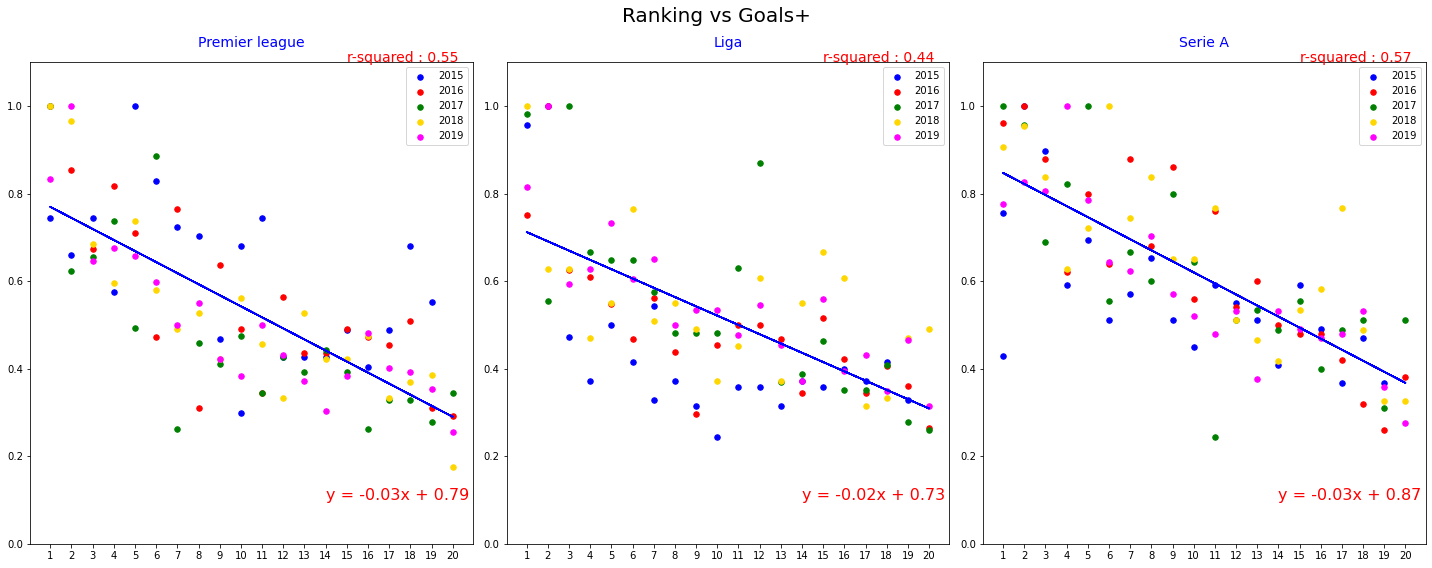

In [24]:
#normalised
plot(list_dfs,"Ranking","Goals+")

---Premier league---
Correlation = 0.78
p-value = 1.697759577579766e-21
----------------------------
---Liga---
Correlation = 0.69
p-value = 1.2095132701182372e-15
----------------------------
---Serie A---
Correlation = 0.76
p-value = 6.172602280639748e-20
----------------------------


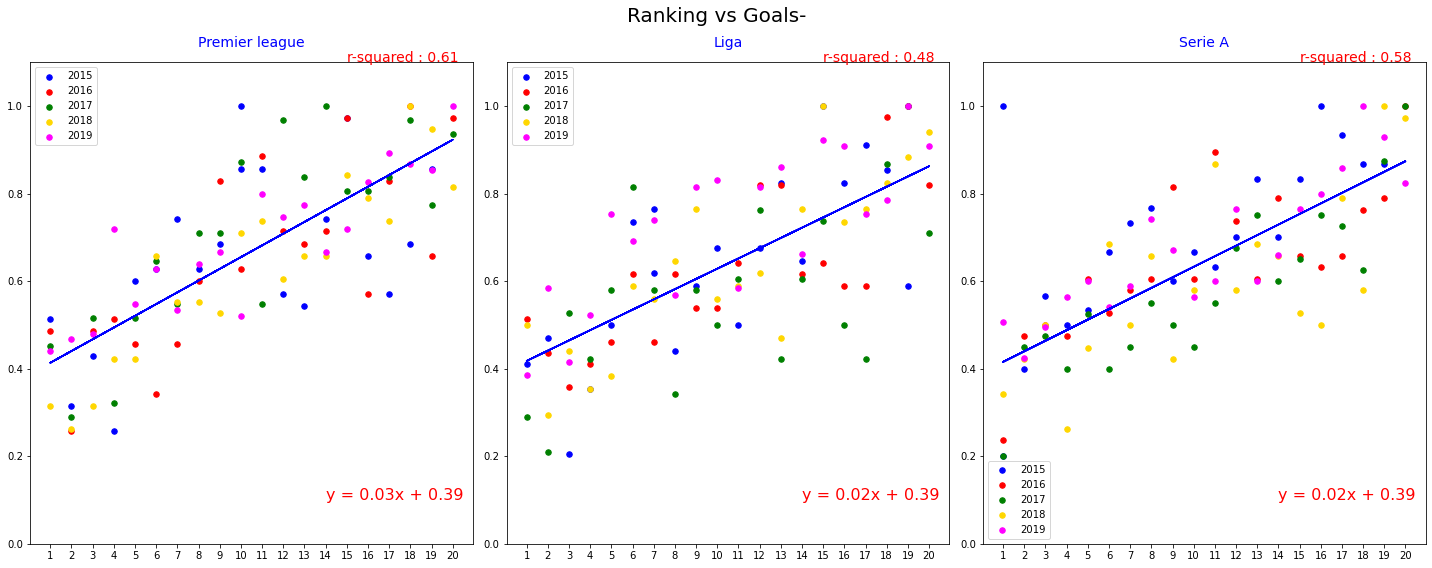

In [25]:
#normalised
plot(list_dfs,"Ranking","Goals-")

---Premier league---
Correlation = 0.39
p-value = 4.769969374851116e-05
----------------------------
---Liga---
Correlation = 0.11
p-value = 0.27977944361019536
----------------------------
---Serie A---
Correlation = -0.19
p-value = 0.06132663578074598
----------------------------


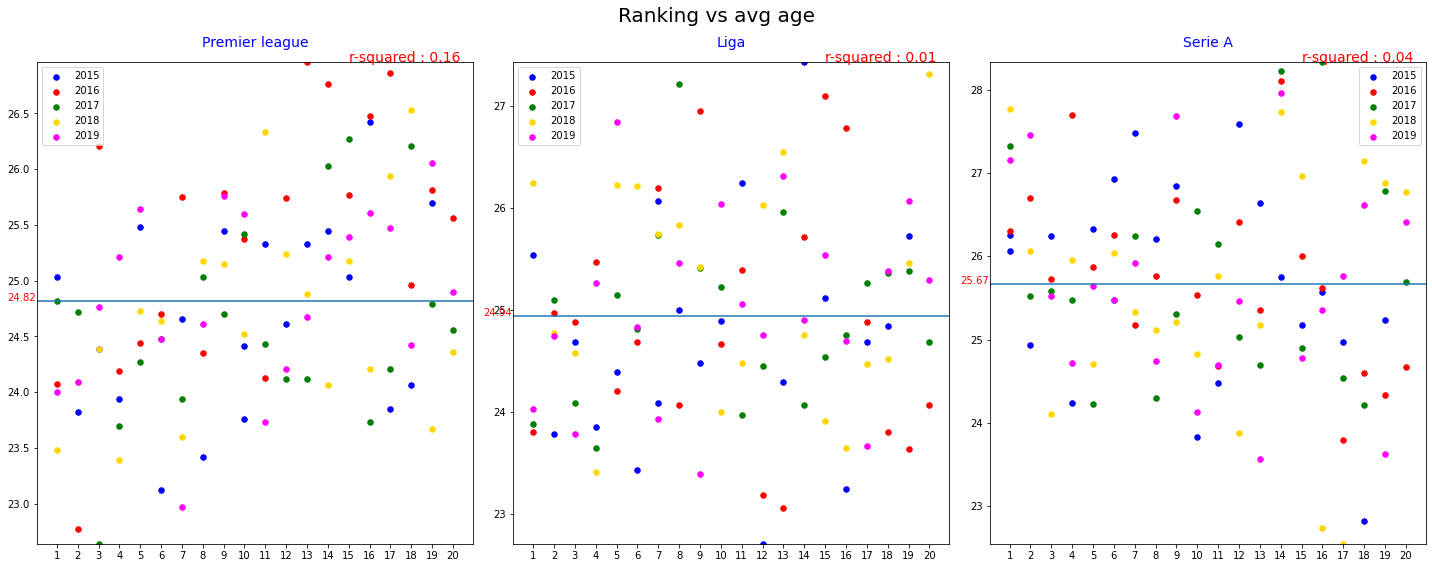

In [17]:
#not normalised
plot(list_dfs,"Ranking","avg age")

---Premier league---
Correlation = 0.14
p-value = 0.16700032290506323
----------------------------
---Liga---
Correlation = 0.01
p-value = 0.9573842246526071
----------------------------
---Serie A---
Correlation = -0.25
p-value = 0.011723462081254696
----------------------------


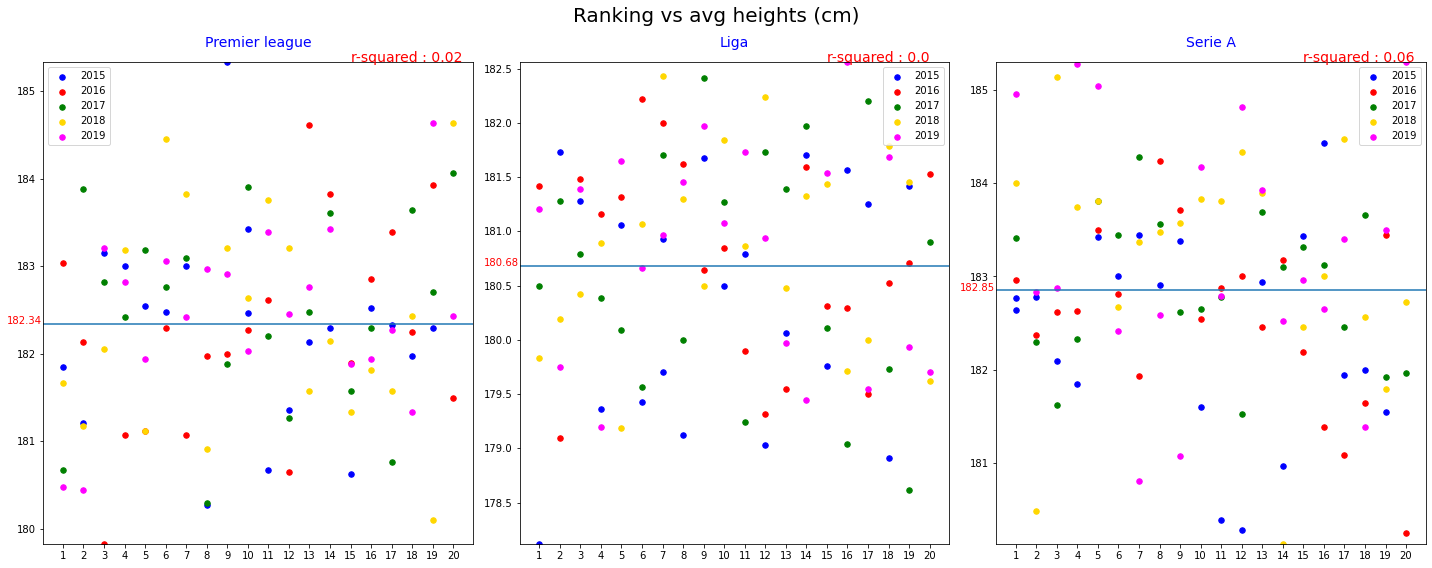

In [18]:
#not normalised
plot(list_dfs,"Ranking","avg heights (cm)")

---Premier league---
Correlation = 0.29
p-value = 0.0031267676078006765
----------------------------
---Liga---
Correlation = -0.08
p-value = 0.43379687326459937
----------------------------
---Serie A---
Correlation = -0.41
p-value = 2.773235578341871e-05
----------------------------


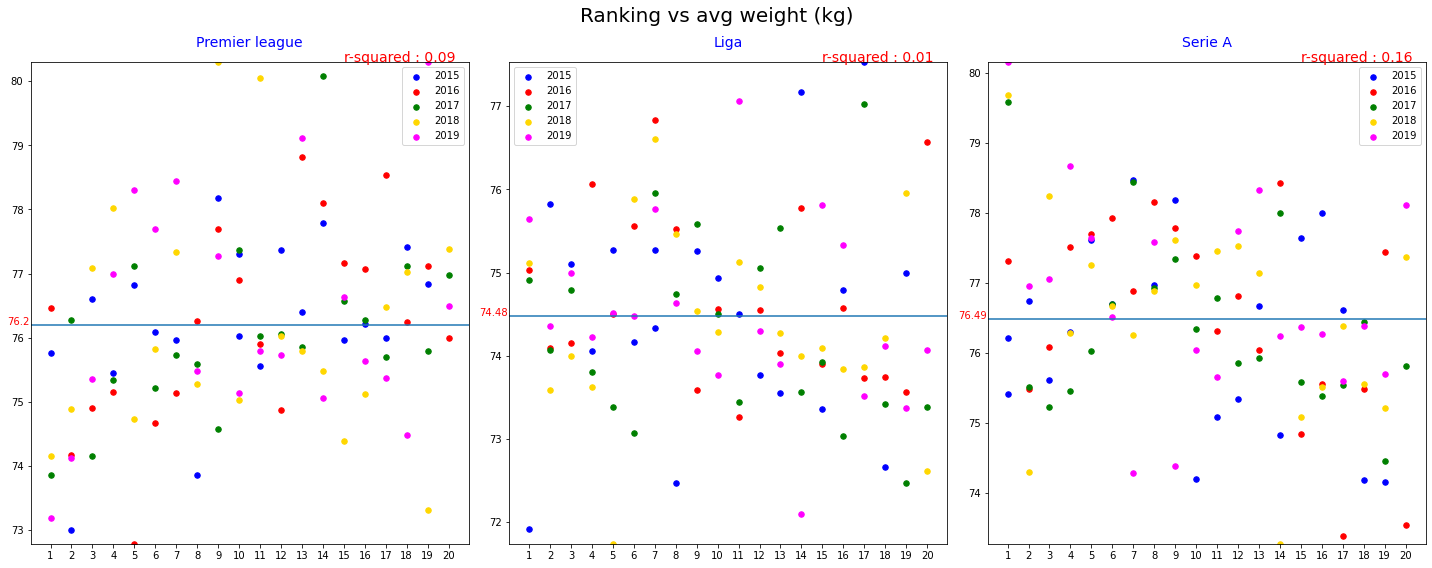

In [19]:
#not normalised
plot(list_dfs,"Ranking","avg weight (kg)")

---Premier league---
Correlation = -0.62
p-value = 7.734138375629081e-12
----------------------------
---Liga---
Correlation = -0.62
p-value = 7.62862786937646e-12
----------------------------
---Serie A---
Correlation = -0.73
p-value = 1.0770942410942966e-17
----------------------------


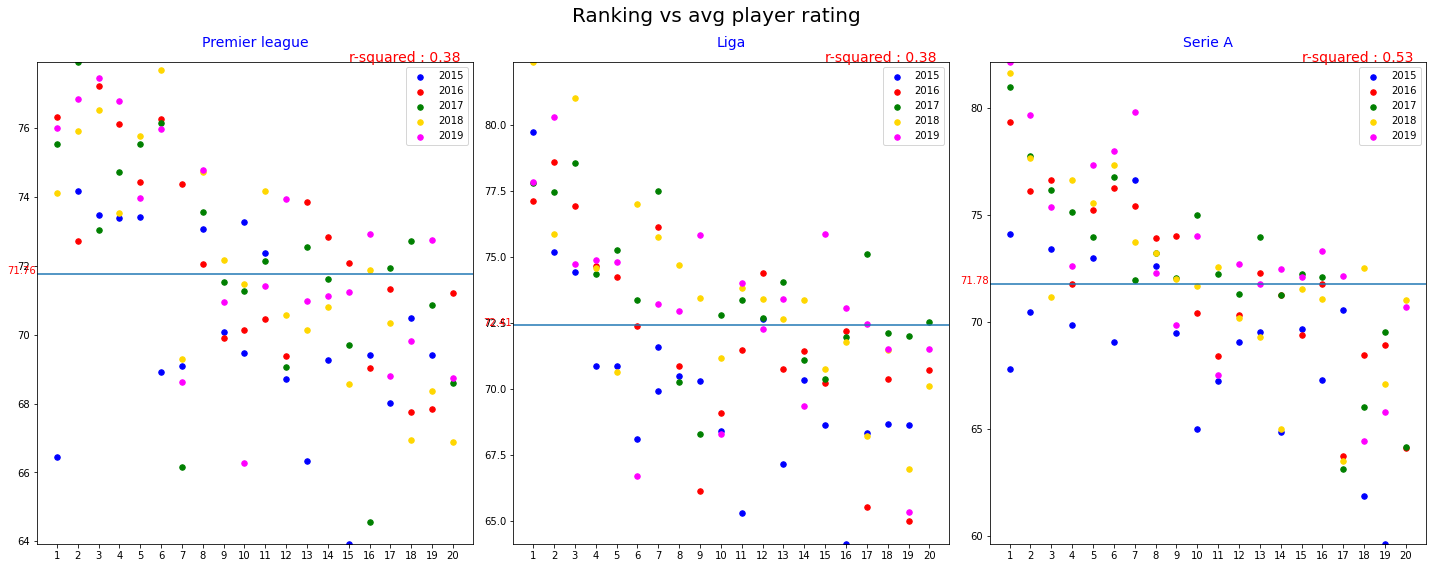

In [16]:
#not normalised
plot(list_dfs,"Ranking","avg player rating")

---Premier league---
Correlation = -0.8
p-value = 8.328102301390753e-19
----------------------------
---Liga---
Correlation = -0.7
p-value = 6.344889209140339e-13
----------------------------
---Serie A---
Correlation = -0.81
p-value = 8.690347698342293e-20
----------------------------


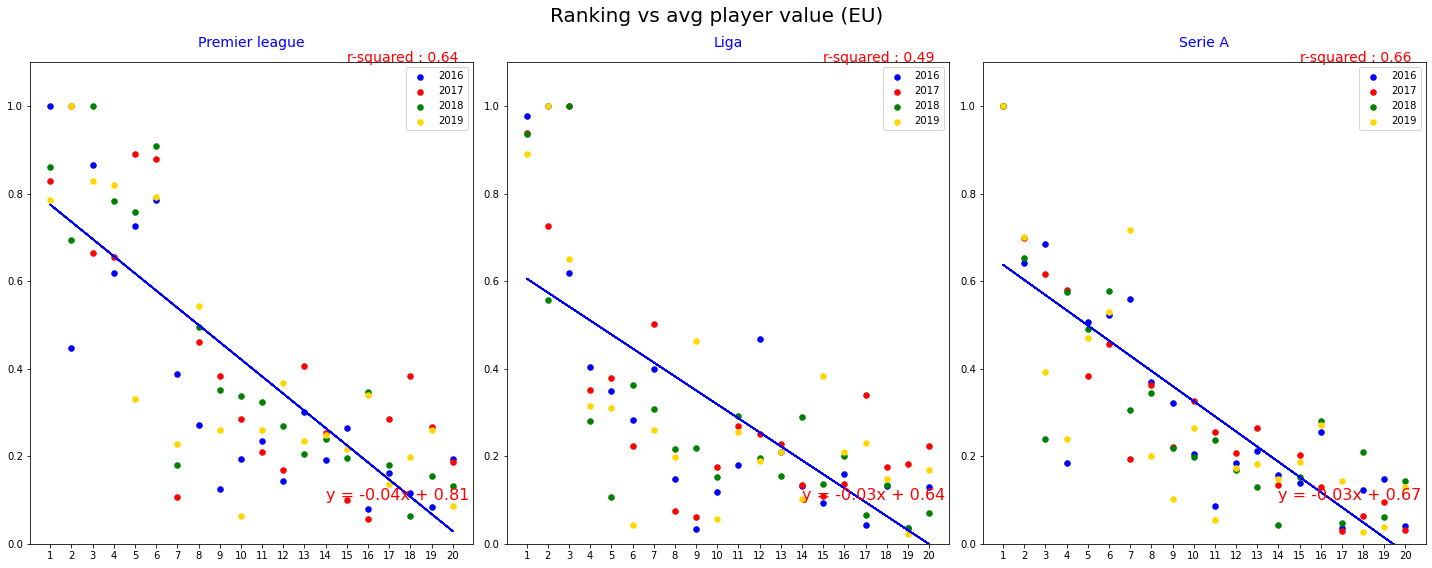

In [26]:
#normalised
plot(list_dfs,"Ranking","avg player value (EU)")

---Premier league---
Correlation = -0.76
p-value = 2.1698403574755604e-16
----------------------------
---Liga---
Correlation = -0.63
p-value = 3.9170994513140307e-10
----------------------------
---Serie A---
Correlation = -0.8
p-value = 8.063929420175678e-19
----------------------------


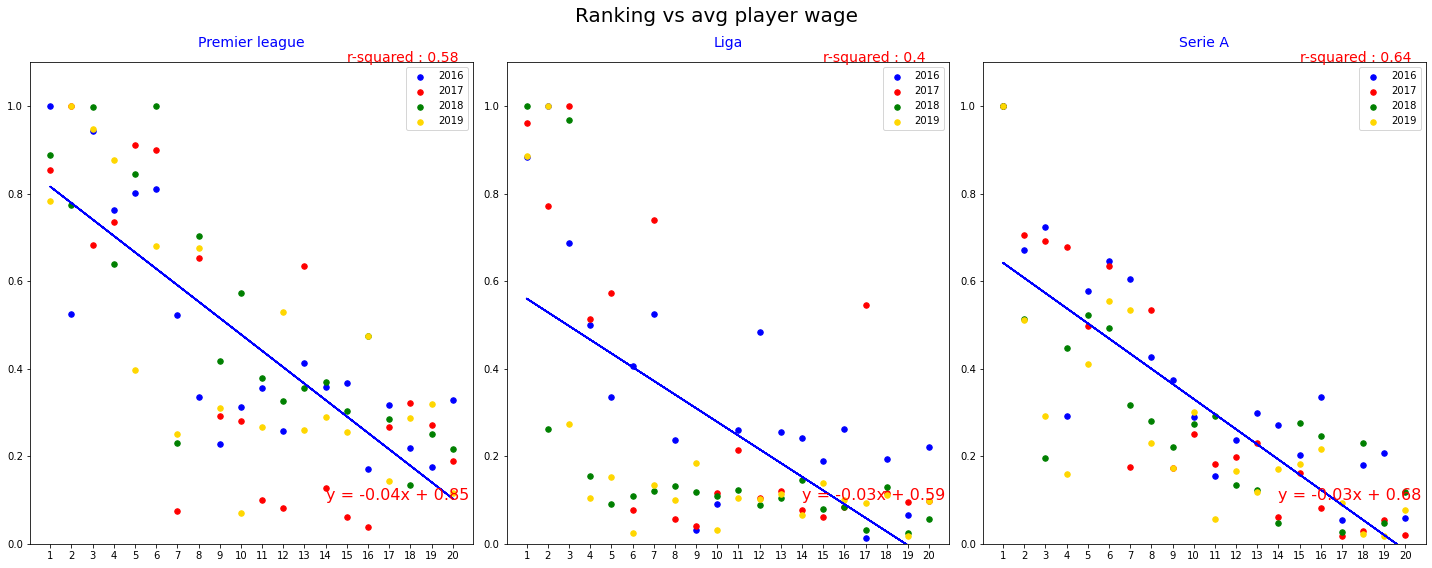

In [27]:
#normalised
plot(list_dfs,"Ranking","avg player wage")

---Premier league---
Correlation = 0.64
p-value = 2.3202789088321438e-10
----------------------------
---Liga---
Correlation = 0.58
p-value = 1.503693200891142e-08
----------------------------
---Serie A---
Correlation = 0.78
p-value = 1.2137179342084408e-17
----------------------------


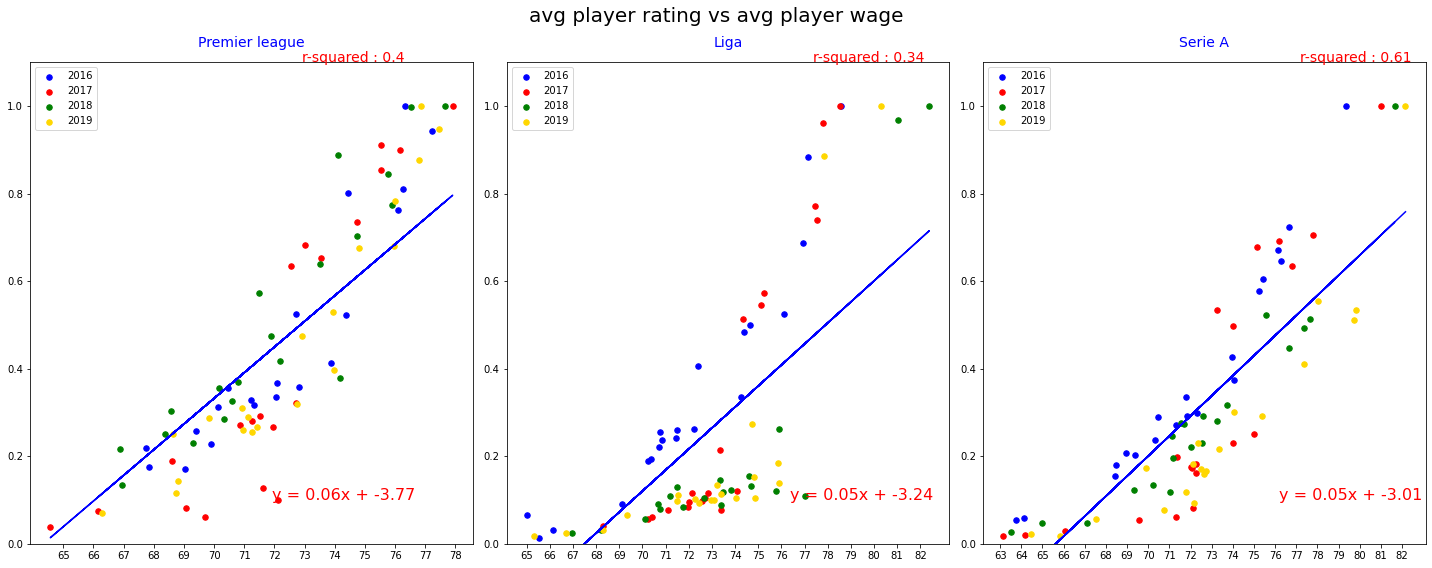

In [28]:
#normalised
plot(list_dfs,"avg player rating","avg player wage")

---Premier league---
Correlation = 0.67
p-value = 1.5378144587456644e-11
----------------------------
---Liga---
Correlation = 0.63
p-value = 3.1071786591303073e-10
----------------------------
---Serie A---
Correlation = 0.77
p-value = 5.1653579860896947e-17
----------------------------


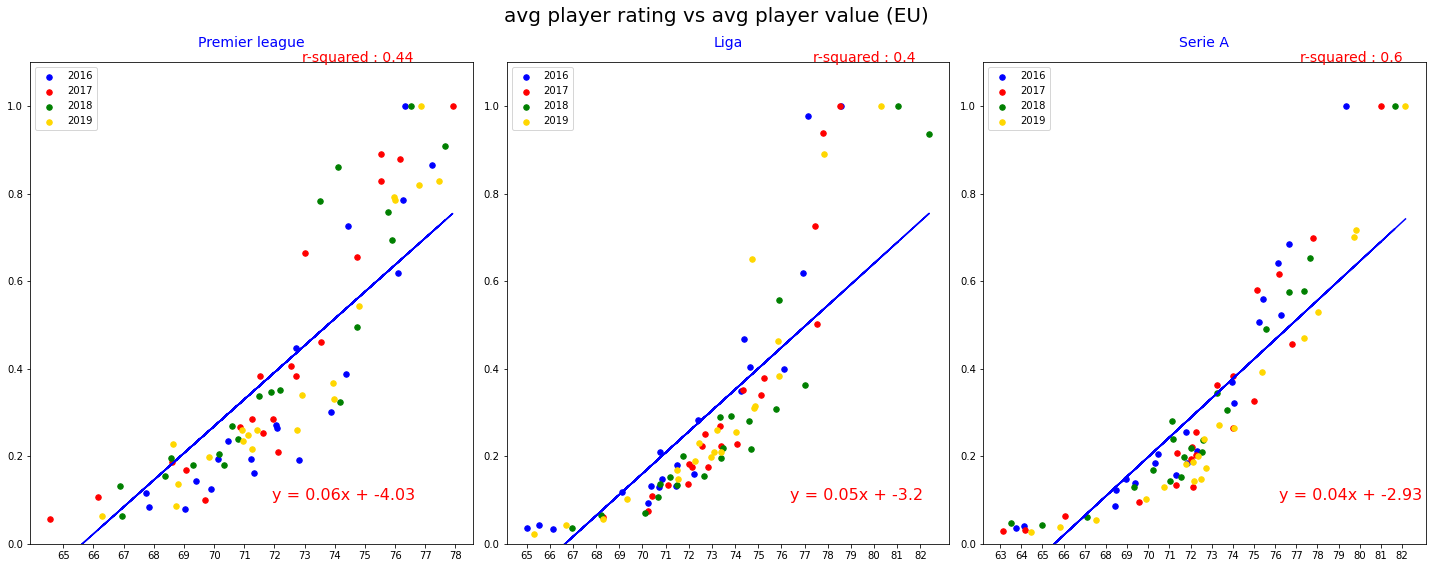

In [29]:
#normalised
plot(list_dfs,"avg player rating","avg player value (EU)")

[Observations]:

* The 2 most important variables are the number of conceeded goals and then the number of scored goals.The top 4 conceeded between 18 and 21 goals where the average is between 27 and 29. The top 4 have an average goal between 48 and 50 where the average is around 34 for the league. 
we observe that a balanced decision is needed but that the defensive players will have an bigger impact on the season's result.

* It seems obvious but the 3 following most important variables to build a winning team are the wage, the player's value and the talent you have in your team.
The average player rating in the top 3 leagues in Europe is around 72 on a scale of 100. This mesure comes from the fifa rating that mesures each player skills and summarise with an overall rating.
With some expetions in 2015 and one in 2018 we observe that none of the top 4 teams have an overal rating below 75. The wage, the value and the rating are strongly correlated. The better the player, the more expensive and the bigger the value.

* Folowing this first observation we clearly see the better the player, the higher the wage and his value. So if we want to build a winning team knowing the needed average player ranking(75), we can prepare a team budget. (or with a defined budget we can try to build or winning team). Notice that the are big differences with an average in the top 4 in Italy around 50k, 66k in Englang and 74k in Spain. The average for the 3 leagues is between 27k and 37k for England.

* Or last observation is that the age, height and weight averages don't explain the ranking. We can't find a real pattern here as the r-squared indicates the independance of the variable . But we see that the average age, height and weight in the top 4 is respectvely around 25 year, 180cm and 75kg.


